In [1]:
from datasets import load_dataset
from dotenv import dotenv_values
from config.finetuning import preprocessing_params
from utils.data_preprocessor import DataPreprocessor

HF_TOKEN = dotenv_values(".env.base")['HF_TOKEN']
hf_e3c = load_dataset("ferrazzipietro/e3c-sentences", token = HF_TOKEN)

/home/pferrazzi/miniconda3/envs/lm_finetune_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
data_preprocessor = DataPreprocessor("mistralai/Mistral-7B-Instruct-v0.2", "mistralai/Mistral-7B-Instruct-v0.2")
d = data_preprocessor.preprocess_data_one_layer(hf_e3c['en.layer1'], simplest_prompt=True)
d['prompt']
# splits = ['en.layer1', 'en.layer2', 'en.layer2.validation', 'en.layer3',
#           'es.layer1', 'es.layer2', 'es.layer2.validation', 'es.layer3',
#           'eu.layer1', 'eu.layer2', 'eu.layer2.validation', 'eu.layer3',
#           'it.layer1', 'it.layer2', 'it.layer2.validation', 'it.layer3',
#           'fr.layer1', 'fr.layer2', 'fr.layer2.validation', 'fr.layer3']
# for split_name in splits:
#     hf_e3c[split_name] = data_preprocessor.apply(data=hf_e3c[split_name], 
#                                                 task=preprocessing_params.task, 
#                                                 instruction_on_response_format=preprocessing_params.instruction_on_response_format, 
#                                                 n_shots=preprocessing_params.n_shots, 
#                                                 offset=preprocessing_params.offset, 
#                                                 tokenizer=preprocessing_params.tokenizer, 
#                                                 list_of_examples=preprocessing_params.list_of_examples,
#                                                 list_of_responses=preprocessing_params.list_of_responses)

Map: 100%|██████████| 1520/1520 [00:00<00:00, 5123.04 examples/s]


['<s>[INST]A 46-year-old man with hypertension and dyslipidemia diagnosed 4-months before, as well as new-onset diabetes mellitus unveiled 1-month earlier, was referred to emergency department for hypokalemia.[/INST][{"entity": "hypertension"}, {"entity": "dyslipidemia"}, {"entity": "diagnosed"}, {"entity": "mellitus"}, {"entity": "referred"}, {"entity": "hypokalemia"}, {"entity": "new-onset diabetes mellitus"}, {"entity": "A 46-year-old man"}, {"entity": "4-months"}, {"entity": "1-month"}] </s>',
 '<s>[INST]Hormonal study and dynamic biochemical tests performed indicated ECS.[/INST][{"entity": "study"}, {"entity": "tests"}, {"entity": "indicated"}, {"entity": "ECS"}] </s>',
 '<s>[INST]Imaging and cytological findings pointed toward a likely primary right parotid malignancy with liver metastases.[/INST][{"entity": "findings"}, {"entity": "pointed"}, {"entity": "primary right parotid malignancy"}, {"entity": "liver metastases"}, {"entity": "primary right parotid malignancy"}, {"entity":

0.5508333333333333

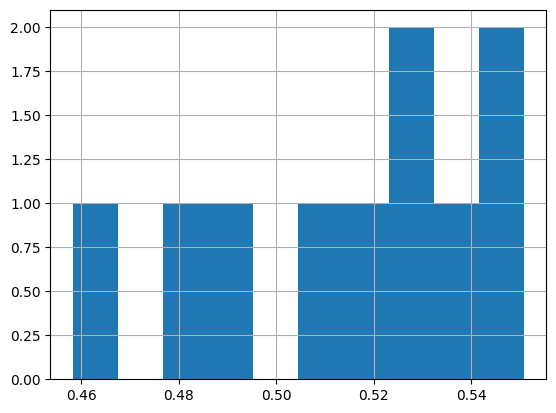

In [2]:
import pandas as pd
d = 'AAA_4bit_base.csv'
df0 = pd.read_csv(d)
df0['f1_score'].hist()
df0['f1_score'].max()

0.5554062654692031

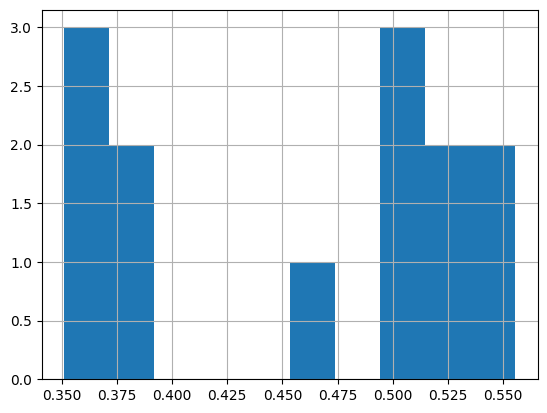

In [1]:
import pandas as pd
d = 'AAA_4bit_base_None.csv'
df0 = pd.read_csv(d)
df0['f1_score'].hist()
df0['f1_score'].max()

In [11]:
import pandas as pd
d = "AAA_7B_NoQuant_FT_float16.csv"
df = pd.read_csv(d)
# l1 = df['file'].to_list()
# l2 = df0['file'].to_list()
# idx = [i for i in l1 if i in l2]
# out = df[df['file'].isin(idx)]
df['f1_score'].hist()

FileNotFoundError: [Errno 2] No such file or directory: 'AAA_7B_NoQuant_FT_float16.csv'

In [9]:
model_id.split('/')[1].lower().split('-')[0]
'lama3' in model_id

False

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from dotenv import dotenv_values

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
HF_TOKEN = dotenv_values(".env.base")['HF_TOKEN']

tokenizer = AutoTokenizer.from_pretrained(model_id,
                                          token = HF_TOKEN,
                                          cache_dir='/data/disk1/share/pferrazzi/.cache')

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    load_in_4bit=True,
    token = HF_TOKEN,
    cache_dir='/data/disk1/share/pferrazzi/.cache'
)

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt"
).to(model.device)

terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]


# outputs = model.generate(
#     input_ids,
#     max_new_tokens=256,
#     eos_token_id=terminators,
#     do_sample=True,
#     temperature=0.6,
#     top_p=0.9,
# )
# response = outputs[0][input_ids.shape[-1]:]
# print(tokenizer.decode(response, skip_special_tokens=True))


tokenizer_config.json: 100%|██████████| 51.0k/51.0k [00:00<00:00, 29.3MB/s]
tokenizer.json: 100%|██████████| 9.08M/9.08M [00:00<00:00, 17.2MB/s]
special_tokens_map.json: 100%|██████████| 73.0/73.0 [00:00<00:00, 269kB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
config.json: 100%|██████████| 654/654 [00:00<00:00, 2.62MB/s]
model.safetensors.index.json: 100%|██████████| 23.9k/23.9k [00:00<00:00, 51.9MB/s]
model-00001-of-00004.safetensors: 100%|██████████| 4.98G/4.98G [00:49<00:00, 101MB/s]
model-00002-of-00004.safetensors: 100%|██████████| 5.00G/5.00G [00:52<00:00, 96.1MB/s]
model-00003-of-00004.safetensors: 100%|██████████| 4.92G/4.92G [00:52<00:00, 94.4MB/s]
model-00004-of-00004.safetensors: 100%|██████████| 1.17G/1.17G [00:11<00:00, 97.4MB/s]
generation_config.json: 100%|██████████| 136/136 [00:00<00:00, 607kB/s]


In [6]:
input_ids

tensor([[128000, 128006,   9125, 128007,    271,   2675,    527,    264,  55066,
           6369,   6465,    889,   2744,  31680,    304,  55066,   6604,      0,
         128009, 128006,    882, 128007,    271,  15546,    527,    499,     30,
         128009, 128006,  78191, 128007,    271]], device='cuda:0')

In [7]:
tokenizer.decode(input_ids[0])

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a pirate chatbot who always responds in pirate speak!<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nWho are you?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n'

In [1]:
from dotenv import dotenv_values
from datasets import load_dataset, Dataset
from utils.data_preprocessor import Slovenian_preprocessor
from utils.test_data_processor import TestDataProcessSlovenian as TestDataProcessor
from utils.generate_ft_adapters_list import generate_ft_adapters_list
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import gc
from peft import PeftModel
from tqdm import tqdm
import pandas as pd

from config import postprocessing_params_llama as postprocessing
from log import slo_llama7B_NoQuant as models_params
adapters_list = generate_ft_adapters_list("slo_llama7B_NoQuant", simplest_prompt=models_params.simplest_prompt)
print(adapters_list)
HF_TOKEN = dotenv_values(".env.base")['HF_TOKEN']
LLAMA_TOKEN = dotenv_values(".env.base")['LLAMA_TOKEN']

max_new_tokens_factor_list = postprocessing.max_new_tokens_factor_list
n_shots_inference_list = postprocessing.n_shots_inference_list
layer = models_params.TRAIN_LAYER
language = 'slo'

tokenizer = AutoTokenizer.from_pretrained(models_params.BASE_MODEL_CHECKPOINT, add_eos_token=False,
                                         token=LLAMA_TOKEN)


val_data = pd.read_csv(models_params.slovenian_test_path, header=None, names=['word', 'label'])
preprocessor = Slovenian_preprocessor(val_data, models_params.BASE_MODEL_CHECKPOINT, tokenizer, token_llama=HF_TOKEN)
preprocessor.preprocess()
preprocessor.apply('', offset=False, simplest_prompt=False)
preprocessor.extract_sentence_from_prompt_col()
val_data = preprocessor.data
val_data = val_data.shuffle(seed=1234)  # Shuffle dataset here
val_data = val_data.map(lambda samples: tokenizer(samples[models_params.dataset_text_field]), batched=True)

      

['ferrazzipietro/llama-2-7b-chat-hf_adapters_SLO_NoQuant_torch.bfloat16_16_32_0.01_1_0.0002', 'ferrazzipietro/llama-2-7b-chat-hf_adapters_SLO_NoQuant_torch.bfloat16_16_64_0.01_1_0.0002', 'ferrazzipietro/llama-2-7b-chat-hf_adapters_SLO_NoQuant_torch.bfloat16_32_32_0.01_1_0.0002', 'ferrazzipietro/llama-2-7b-chat-hf_adapters_SLO_NoQuant_torch.bfloat16_32_64_0.01_1_0.0002']


/home/pferrazzi/mistral_finetuning/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


MODEL TYPE: llama


Map:   0%|          | 0/855 [00:00<?, ? examples/s]

Map:   0%|          | 0/855 [00:00<?, ? examples/s]

Map:   0%|          | 0/855 [00:00<?, ? examples/s]

In [2]:
bnb_config = BitsAndBytesConfig(
                            load_in_4bit=True,
                            )
base_model = AutoModelForCausalLM.from_pretrained(
                    models_params.BASE_MODEL_CHECKPOINT, low_cpu_mem_usage=True,
                    quantization_config = bnb_config,
                    return_dict=True,  
                    device_map= "auto",
                    token=LLAMA_TOKEN,
                    cache_dir='/data/disk1/share/pferrazzi/.cache')

/home/pferrazzi/mistral_finetuning/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:

adapters ='ferrazzipietro/Llama-2-7b-chat-hf_adapters_SLO_NoQuant_torch.bfloat16_32_32_0.01_1_0.0002'
merged_model = PeftModel.from_pretrained(base_model, 
                                                    adapters, 
                                                    token=HF_TOKEN, 
                                                    device_map='auto',
                                                    is_trainable = False)
tokenizer = AutoTokenizer.from_pretrained(models_params.BASE_MODEL_CHECKPOINT, 
                                                    add_eos_token=False,
                                                    token=LLAMA_TOKEN)
tokenizer.pad_token = tokenizer.eos_token# "<pad>" #tokenizer.eos_token
tokenizer.padding_side = "left"
postprocessor = TestDataProcessor(test_data=val_data.select(range(8)), 
                                            preprocessor=preprocessor, 
                                            n_shots_inference=0, 
                                            language=language, 
                                            tokenizer=tokenizer)
postprocessor.add_inference_prompt_column(simplest_prompt=False)
            # tmp = []
            # for example in postprocessor.test_data:
            #     tmp.append(example)
            # import pandas as pd
            # tmp = pd.DataFrame(tmp)
            # tmp = tmp.iloc[tmp['inference_prompt'].str.len().argsort()]
            # postprocessor.test_data = Dataset.from_pandas(tmp)
postprocessor.add_ground_truth_column()
            #try:
postprocessor.add_responses_column(model=merged_model, 
                                            tokenizer=tokenizer, 
                                            batch_size=postprocessing.batch_size, 
                                            max_new_tokens_factor=2)

Map:   0%|          | 0/8 [00:00<?, ? examples/s]

Map:   0%|          | 0/8 [00:00<?, ? examples/s]

generating responses:   0%|          | 0/8 [00:00<?, ?it/s]/home/pferrazzi/mistral_finetuning/.venv/lib/python3.12/site-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.')
generating responses: 24it [00:49,  2.06s/it]              


In [4]:
postprocessor.test_data[0]['inference_prompt']

'<s>[INST]  <<nujna srčna kateterizacija je razkrila lokalne disekcije v štirih koronarnih arterijah majhnega kalibra v desnem in levem koronarnem sistemu , vključno z desno posteriorno padajočo , posterolateralno , obtusno marginalno in septalno arterijo .>>> [/INST]'

In [8]:
t = tokenizer("Having a background history of fever, backache, skin rash")
print(t)
tokenizer.convert_ids_to_tokens(t['input_ids'])

{'input_ids': [1, 15950, 263, 3239, 4955, 310, 1238, 369, 29892, 1250, 1829, 29892, 19309, 364, 1161], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


['<s>',
 '▁Having',
 '▁a',
 '▁background',
 '▁history',
 '▁of',
 '▁fe',
 'ver',
 ',',
 '▁back',
 'ache',
 ',',
 '▁skin',
 '▁r',
 'ash']

In [ ]:
▁Having ▁a ▁background ▁history ▁of ▁fe ver , ▁back ache , ▁skin ▁r ash